In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
#Image Classification
import tensorflow as tf

data_dir = "/kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07"

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(128, 128),  # resize all images
    batch_size=32           # number of images per batch
)

class_names = dataset.class_names
print("Classes:", class_names)

Found 10153 files belonging to 5 classes.
Classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']


In [8]:
#Load and prepare dataset
import tensorflow as tf

# Path to your dataset folder
data_dir = "/kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07"

# Load dataset from folders (80% training, 20% validation)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,                # ensures reproducibility
    image_size=(128, 128),   # resize all images
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Show class names
class_names = train_ds.class_names
print("Detected Classes:", class_names)


# Normalize pixel values (0-255 → 0-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

Found 10153 files belonging to 5 classes.
Using 8123 files for training.
Found 10153 files belonging to 5 classes.
Using 2030 files for validation.
Detected Classes: ['Apple', 'Banana', 'Grape', 'Mango', 'Orange']


In [9]:
#Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 46s 169ms/step - accuracy: 0.7022 - loss: 0.8673 - val_accuracy: 0.9325 - val_loss: 0.1958
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 44s 172ms/step - accuracy: 0.9375 - loss: 0.1729 - val_accuracy: 0.9626 - val_loss: 0.1036
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - accuracy: 0.9722 - loss: 0.0809 - val_accuracy: 0.9655 - val_loss: 0.0968
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 42s 164ms/step - accuracy: 0.9810 - loss: 0.0596 - val_accuracy: 0.9714 - val_loss: 0.0819
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.9798 - loss: 0.0560 - val_accuracy: 0.9847 - val_loss: 0.0508
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 44s 173ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9852 - val_loss: 0.0453
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9527 - val_loss: 0.1439
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.9790 - loss: 0

In [11]:
#Evaluate the model
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc*100:.2f}%")

64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9805 - loss: 0.0677
Validation Accuracy: 98.23%


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.9889 - loss: 0.0286 - val_accuracy: 0.9828 - val_loss: 0.0531
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - accuracy: 0.9979 - loss: 0.0056 - val_accuracy: 0.9803 - val_loss: 0.0632
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 43s 169ms/step - accuracy: 0.9913 - loss: 0.0220 - val_accuracy: 0.9897 - val_loss: 0.0324
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 44s 174ms/step - accuracy: 0.9999 - loss: 0.0010 - val_accuracy: 0.9892 - val_loss: 0.0376
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - accuracy: 0.9999 - loss: 8.8450e-04 - val_accuracy: 0.9714 - val_loss: 0.0983
Epoch 6/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 44s 172ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9660 - val_loss: 0.1629
Epoch 7/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 48s 188ms/step - accuracy: 0.9932 - loss: 0.0145 - val_accuracy: 0.9793 - val_loss: 0.0748
Epoch 8/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 44s 173ms/step - accuracy: 0.9965 - los

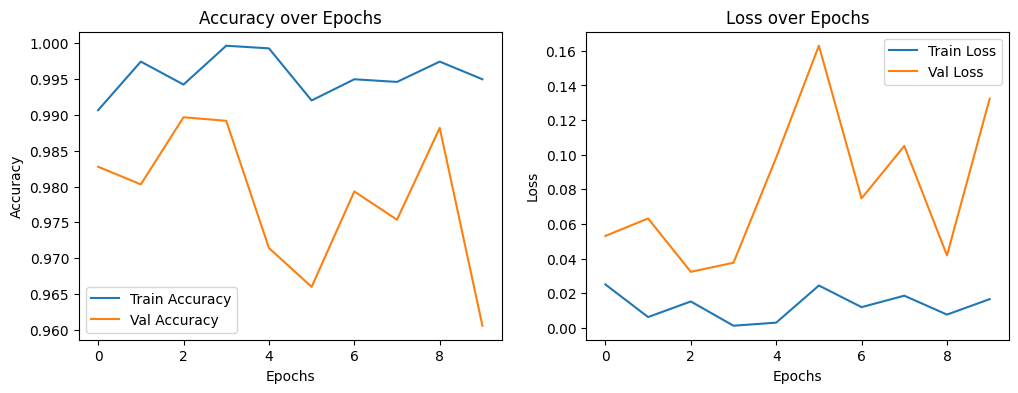

In [13]:
# Train with history tracking
import matplotlib.pyplot as plt

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Plot accuracy & loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [14]:
import os
os.listdir("/kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07/Apple")

['Formalin-mixed', 'Fresh', 'Rotten', 'desktop.ini']

In [15]:
import os
os.listdir("/kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07/Apple/Fresh")

['msg5170347760-66144.jpg',
 'msg5170347760-63914.jpg',
 'msg5170347760-69532.jpg',
 'WhatsApp Image 2024-06-22 at 10.44.20 PM (1).jpeg',
 'msg5170347760-69543.jpg',
 'msg5170347760-65655.jpg',
 'msg5170347760-69547.jpg',
 'msg5170347760-69495.jpg',
 'WhatsApp Image 2024-06-21 at 11.09.33 PM.jpeg',
 'msg5170347760-68556.jpg',
 'msg5170347760-69498.jpg',
 'msg5170347760-65692.jpg',
 'WhatsApp Image 2024-06-22 at 10.44.38 PM (1).jpeg',
 'msg5170347760-66281.jpg',
 'msg5170347760-63910.jpg',
 'msg5170347760-68553.jpg',
 'msg5170347760-69565.jpg',
 'msg5170347760-68554.jpg',
 'msg5170347760-69576.jpg',
 'msg5170347760-66119.jpg',
 'msg5170347760-65729.jpg',
 'msg5170347760-66194.jpg',
 'msg5170347760-63929.jpg',
 'msg5170347760-69551.jpg',
 'msg5170347760-69605.jpg',
 'msg5170347760-65683.jpg',
 'msg5170347760-69515.jpg',
 'msg5170347760-63155.jpg',
 'msg5170347760-69596.jpg',
 'msg5170347760-66191.jpg',
 'WhatsApp Image 2024-06-07 at 2.26.05 AM.jpg',
 'msg5170347760-68623.jpg',
 'msg51703

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
Predicted Class: Apple (99.66% confidence)


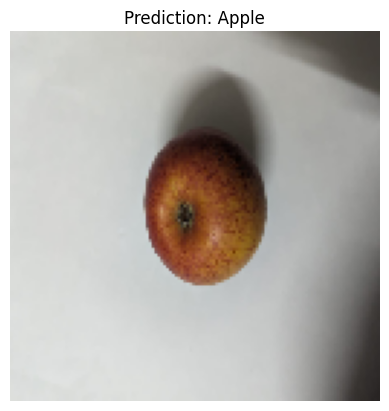

In [16]:
#Test on a single image
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Path to any image in your dataset
img_path = "/kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07/Apple/Fresh/IMG-20240612-WA0078.jpg"  # change to your file

# Load & preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # batch dimension
img_array = img_array / 255.0  # normalize

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
confidence = np.max(predictions) * 100

print(f"Predicted Class: {predicted_class} ({confidence:.2f}% confidence)")

# Show image
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class}")
plt.show()

In [17]:
#Install and Import Dependencies
!pip install torch torchvision lightly --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:0000:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.3/859.3 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [18]:
import os
import shutil

# Path to the .ipynb_checkpoints directory
checkpoints_dir = "/kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07/.ipynb_checkpoints"

# Check if the directory exists before attempting to remove it
if os.path.exists(checkpoints_dir):
    shutil.rmtree(checkpoints_dir)
    print(f"Removed directory: {checkpoints_dir}")
else:
    print(f"Directory not found: {checkpoints_dir}")

Directory not found: /kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07/.ipynb_checkpoints


In [19]:
import lightly.models.utils as lightly_utils
print(dir(lightly_utils))

['CrossMapLRN2d', 'Dict', 'GroupNorm', 'Identity', 'Iterable', 'LayerNorm', 'List', 'LocalResponseNorm', 'Module', 'Optional', 'Parameter', 'Sequential', 'StochasticDepth', 'TYPE_CHECKING', 'Tensor', 'Tuple', 'Type', 'Union', '_NORM_LAYERS', '_NormBase', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_mask_reduce', '_mask_reduce_batched', '_no_grad_trunc_normal', 'activate_requires_grad', 'add_stochastic_depth_to_blocks', 'annotations', 'apply_masks', 'batch_shuffle', 'batch_shuffle_distributed', 'batch_unshuffle', 'batch_unshuffle_distributed', 'concat_all_gather', 'deactivate_requires_grad', 'dependency', 'dist', 'expand_index_like', 'functional', 'get_1d_sine_cosine_positional_embedding_from_positions', 'get_2d_sincos_pos_embed', 'get_2d_sine_cosine_positional_embedding', 'get_2d_sine_cosine_positional_embedding_from_grid', 'get_at_index', 'get_named_leaf_modules', 'get_weight_decay_parameters', 'init', 'initialize_2d_sine_

In [20]:
#Prepare Dataset (Unlabeled for Pretraining)
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Data augmentations for SimCLR
simclr_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=128),
    transforms.RandomHorizontalFlip(),
    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor()
])

# Custom function to check if a file is a valid image and not in .ipynb_checkpoints
def is_valid_image_file(path):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp')
    return os.path.isfile(path) and path.lower().endswith(valid_extensions) and '.ipynb_checkpoints' not in path

# Load dataset without labels, using the custom check
dataset_unlabeled = datasets.ImageFolder(root="/kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07", transform=simclr_transform, is_valid_file=is_valid_image_file)
dataloader_unlabeled = DataLoader(dataset_unlabeled, batch_size=64, shuffle=True, num_workers=2)

print(f"Found {len(dataset_unlabeled)} unlabeled images.")

Found 10153 unlabeled images.


In [21]:
#Define SimCLR Model
import torch
import torch.nn as nn
from lightly.models.modules import SimCLRProjectionHead
import torchvision.models as models # Import torchvision models

# Backbone (ResNet-18)
resnet = models.resnet18(pretrained=True) # Load pre-trained ResNet-18
backbone = nn.Sequential(*list(resnet.children())[:-1])  # remove classifier

# Projection head
# The input features to the projection head will be 512 for ResNet-18
projection_head = SimCLRProjectionHead(512, 512, 128)

# Full SimCLR model
class SimCLR(nn.Module):
    def __init__(self, backbone, projection_head):
        super().__init__()
        self.backbone = backbone
        self.projection_head = projection_head

    def forward(self, x):
        h = self.backbone(x).flatten(start_dim=1)
        z = self.projection_head(h)
        return z

model = SimCLR(backbone, projection_head)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]


In [22]:
#Loss & Optimizer
from lightly.loss import NTXentLoss

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

criterion = NTXentLoss(temperature=0.5)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [25]:
#Pretrain with SimCLR
# ------- 1) Imports -------
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------- 2) SimCLR augmentations (PIL -> Tensor) -------
image_size = 128
simclr_aug = transforms.Compose([
    transforms.RandomResizedCrop(image_size, scale=(0.2, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
])

# ------- 3) Dataset wrapper that returns TWO views per sample (x1, x2) -------
class SimCLRDataset(Dataset):
    def __init__(self, root, base_transform):
        # ImageFolder returns PIL images by default (no transform) -> perfect
        self.base = datasets.ImageFolder(root=root)  # labels ignored in pretraining
        self.t = base_transform

    def __len__(self):
        return len(self.base)

    def __getitem__(self, idx):
        img, _ = self.base[idx]      # img is PIL Image
        x1 = self.t(img)             # Tensor CxHxW
        x2 = self.t(img)             # independent random view
        return x1, x2

# Create loader that yields (x1, x2)
pretrain_ds = SimCLRDataset(root="/kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07", base_transform=simclr_aug)
dataloader_unlabeled = DataLoader(pretrain_ds, batch_size=64, shuffle=True, num_workers=2, drop_last=True)

# ------- 4) NT-Xent loss (SimCLR) -------
def nt_xent_loss(z1, z2, temperature=0.5):
    # z1,z2: (B, D)
    z1 = F.normalize(z1, dim=1)
    z2 = F.normalize(z2, dim=1)

    N = z1.size(0)
    z = torch.cat([z1, z2], dim=0)            # (2N, D)
    sim = torch.matmul(z, z.t()) / temperature  # (2N, 2N)

    # mask out self-similarity on the diagonal
    mask = torch.eye(2 * N, dtype=torch.bool, device=sim.device)
    sim = sim.masked_fill(mask, -1e9)

    # target index of positive for each row
    positives = torch.arange(N, 2 * N, device=sim.device)
    positives = torch.cat([positives, torch.arange(0, N, device=sim.device)], dim=0)  # (2N,)

    loss = F.cross_entropy(sim, positives)
    return loss

# ------- 5) Training loop (MODEL must output projection vectors) -------
# Assumes you already defined:
#   model: encoder + projection head -> (B, D)
#   optimizer: optimizer for model parameters
model.train()

for epoch in range(10):
    total_loss = 0.0
    for x1, x2 in dataloader_unlabeled:
        x1, x2 = x1.to(device, non_blocking=True), x2.to(device, non_blocking=True)

        z1 = model(x1)      # (B, D) projection
        z2 = model(x2)      # (B, D)

        loss = nt_xent_loss(z1, z2, temperature=0.5)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/10] - Loss: {total_loss/len(dataloader_unlabeled):.4f}")


Epoch [1/10] - Loss: 3.4472
Epoch [2/10] - Loss: 3.2973
Epoch [3/10] - Loss: 3.2575
Epoch [4/10] - Loss: 3.2255
Epoch [5/10] - Loss: 3.2167
Epoch [6/10] - Loss: 3.1864
Epoch [7/10] - Loss: 3.1868
Epoch [8/10] - Loss: 3.1765
Epoch [9/10] - Loss: 3.1622
Epoch [10/10] - Loss: 3.1562


In [26]:
#Fine-tuning for Classification
from torch.utils.data import random_split

# Data for classification (with labels)
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset_labeled = datasets.ImageFolder(root="/kaggle/input/fresh-rotten-and-formalin-mixed-fruit-detection/Fruits Original-ML-GRP-07", transform=train_transform)

# Split into train/test sets (80/20)
train_size = int(0.8 * len(dataset_labeled))
test_size = len(dataset_labeled) - train_size
train_dataset, test_dataset = random_split(dataset_labeled, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Classifier head
num_classes = len(dataset_labeled.classes)
classifier = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512, num_classes)  # 512 from ResNet backbone
)

# Combine backbone + classifier
model_finetune = nn.Sequential(
    backbone,  # pretrained backbone from SimCLR
    nn.Flatten(),
    classifier
).to(device)

# Freeze backbone parameters
for param in backbone.parameters():
    param.requires_grad = False

# Loss & optimizer
criterion_cls = nn.CrossEntropyLoss()
optimizer_cls = torch.optim.Adam(classifier.parameters(), lr=1e-3)


In [27]:
#Training the Classifier
# Training loop
for epoch in range(10):
    model_finetune.train()
    running_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer_cls.zero_grad()
        outputs = model_finetune(images)
        loss = criterion_cls(outputs, labels)
        loss.backward()
        optimizer_cls.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/10], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

Epoch [1/10], Loss: 0.1126, Train Acc: 96.90%
Epoch [2/10], Loss: 0.0670, Train Acc: 97.97%
Epoch [3/10], Loss: 0.0576, Train Acc: 98.14%
Epoch [4/10], Loss: 0.0632, Train Acc: 97.98%
Epoch [5/10], Loss: 0.0654, Train Acc: 98.07%
Epoch [6/10], Loss: 0.0593, Train Acc: 98.21%
Epoch [7/10], Loss: 0.0595, Train Acc: 98.10%
Epoch [8/10], Loss: 0.0524, Train Acc: 98.34%
Epoch [9/10], Loss: 0.0551, Train Acc: 98.07%
Epoch [10/10], Loss: 0.0544, Train Acc: 98.34%


In [29]:
#Testing
model_finetune.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_finetune(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 99.31%
